In [ ]:
CW1 Supporting Code

In [192]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
%matplotlib inline

In [109]:
data_path = os.path.join(os.getcwd(), 'data', 'regression_part1.csv')
data1 = pd.read_csv(data_path, delimiter = ',')

In [9]:
data1.shape

(50, 2)

In [10]:
data1.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [110]:
start = np.ones((data1.shape[0], 1))
data1.insert(0, 'name', start)

In [162]:
sums = data1.sum(axis=0) # sums of each column (1s, revision time, exam score)
squared = np.square(data1['revision_time']) # square of revision times, x^2
xsquared_sum = squared.sum(axis=0) # sum of x^2
xy = data1['revision_time'] * data1['exam_score'] # product of revision time and exam score, xy
xny_sum = xy.sum(axis=0) # sum of xy

In [168]:
# sum of x, sum of y, sum(x)*sum(x), sum(x)*sum(y), sum of 1s (number of datapoints n)
x_sum, y_sum, xx_sum, xy_sum, n = sums[1], sums[2], (sums[1]*sums[1]), (sums[1]*sums[2]), sums[0]
# formula for gradient = w1
w1 = (xny_sum - (xy_sum / n))/(xsquared_sum - (xx_sum / n))
# formula for intercept = w0
w0 = (y_sum / n) - gradient * (x_sum / n)
print(w0, w1)

17.897680258350157 1.4411409054379716


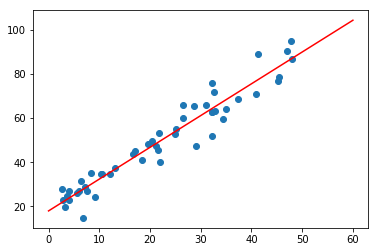

In [167]:
fig, ax = plt.subplots()
ax.scatter(data1['revision_time'], data1['exam_score'])
x_axis = np.linspace(0,60,5)
y_axis = gradient*x_axis+intercept
ax.plot(x_axis, y_axis, '-r', label='y=2x+1')
plt.show()

In [108]:
inv_first = np.linalg.inv(np.matmul(np.transpose(X), X)) # (X^T*X)^-1
second = np.matmul(inv_first, np.transpose(X)) # ((X^T*X)^-1)*X^T
w = np.matmul(second, y)
w

array([17.89768026,  1.44114091])

In [ ]:
fig, ax = plt.subplots()
ax.scatter(data1['revision_time'], data1['exam_score'])
ax.plot(data1["revision_time", y_axis, '-r', label='y=2x+1')
plt.show()

In [173]:
X = data1.drop(['exam_score'], axis=1)
y = data1['exam_score']
lm = LinearRegression(fit_intercept=False)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [176]:
predicted_score = lm.predict(X)

In [179]:
diff = y - predicted_score

In [193]:
MSE = mean_squared_error(y, predicted_score)
MSE

30.985472614541294

In [194]:
w = np.array([w0, w1])
other_predicted = np.matmul(X, w)
other_diff = y - other_predicted
other_MSE = mean_squared_error(y, other_predicted)
other_MSE

30.985472614541287

In [230]:
new_w1 = np.linspace(-2,2,100)
mses = np.matmul(X, np.array([w0, ww1]))
plt.plot(new_w1, mses)
#plt.xlabel("w1")
#plt.show()

ValueError: setting an array element with a sequence.